In [15]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.size"] = 18

# Radiation Interatctions with Matter

### Learning Objectives

- Define uncollided flux
- Define linear interaction coefficient
- Apply linear interaction coefficients to a slab problem
- Identify the units of intensity, flux density, fluence, reaction rate
- Compare linear interaction coefficient and cross section
- Calculate uncollided flux in a medium 
- Calculate mean free path of a particle in a medium
- Define the half thickness in a medium
- Apply the concept of buildup factor to attenuation in a slab
- Define microscopic cross section
- Calculate macroscopic cross sections, given a microscopic cross section
- Calculate the mass interaction coefficients of mixtures
- Calculate flux density
- Calculate Reaction Rate Density
- Recognize the dependence of flux on energy, position, and time
- Define radiation fluence
- Calculate uncollided flux density from isotropic point sources
- Apply the Kelin-Nishina formula to Compton Scattering
- Compare energy dependence of photon interaction cross sections
- Describe energy dependence of neutron interaction cross sections
- Recognize the comparative range of heavy vs. light particles 
- Recognize the comparative range of charged particles

## Linear Interaction Coefficient

- The interaction of radiation with matter is always statistical in nature, and, therefore, must be described in probabilistic terms. 

Consider a particle travelling through a homogeneous material.

\begin{align}
P_i(\Delta x) &= \mbox{probability the particle, causes a reaction of type i in distance }\Delta x\\
\end{align}

Empirically, we find that this probability becomes constant as $\Delta x \longrightarrow 0$. Thus:


\begin{align}
\mu_i &= \lim_{\Delta x \rightarrow 0}\frac{P_i(\Delta x)}{\Delta x}\\
\end{align}

Facts about $\mu_𝑖$:

- $\mu_i$ is an *intrinsic* property of the material for a given incident particle and interaction. 
- $\mu_i$ is independent of the path length traveled prior to the interaction. 
- $\mu_i$ may represent many types of interaction (scattering: $\mu_s$, absorption: $\mu_a$, ...)
- $\mu_i$ typically depends on particle energy


The probability, per unit path length, that a neutral particle undergoes some sort of reaction, is the sum of the probabilities, per unit path length of travel, for each type :

\begin{align}
\mu_t(E) = \sum_i \mu_i(E)
\end{align}

## Think Pair Share:

What are the units of the linear interaction coefficient?

### Attenuation of Uncollided Flux

Imagine a plane of neutral particles strike a slab of some material, normal to the surface. 

We can describe this using $\mu_t$ or, equivalently, the macroscopic total cross section $\Sigma_t$. 


\begin{align}
I(x) &= I_0e^{-\mu_t x}\\
I(x) &= I_0e^{-\Sigma_t x}\\
\end{align}

where

\begin{align}
        I(x) &= \mbox{uncollided intensity at distance x}\\
        I_0 &= \mbox{initial uncollided intensity}\\
        \mu_t &= \mbox{total linear interaction coefficient} \\
        \Sigma_t &= \mbox{macroscopic total cross section} \\
        x &= \mbox{distance into material [m]}\\
\end{align}


In [70]:
import math
def attenuation(distance, initial=100, sig_t=1):
    """This function describes neutron attenuation into the slab"""
    return initial*math.exp(-sig_t*distance)


Rather than intensity, one can find the probability density:

We have a strong analogy between decay and attenuation, as above. In the case of decay the probability of decay in a time interval dt is:

\begin{align}
P(t)dt &= \lambda e^{-\lambda t}dt\\
 &= \mbox{probability of decay in interval dt}
\end{align}

From this, one can find the mean lifetime of a neutron before decay:

\begin{align}
\bar{t} &= \int_0^\infty t'P(t')dt'\\
        &= \int_0^\infty t'\lambda e^{-\lambda t'}dt'\\        
        &= \frac{1}{\lambda}
\end{align}

In the case of attenuation:
\begin{align}
P(x)dx &= \Sigma_te^{-\Sigma_tx}dx
\end{align}

Such that: 

\begin{align}
P(x)dx &= \mu_t e^{-\mu_t x}dx\\
 &= \Sigma_t e^{-\Sigma_t x}dx\\
 &= \mbox{probability of interaction in interval dx}
\end{align}


So, the mean free path is:

\begin{align}
\bar{l} &= \int_0^\infty x'P(x')dx'\\
        &= \int_0^\infty x'\Sigma_te^{-\Sigma_t x'}dx'\\        
        &= \frac{1}{\Sigma_t}
\end{align}


Or, equivalently in $\mu_t$ notation:

\begin{align}
\bar{x} &= \int_0^\infty x'P(x')dx'\\
        &= \int_0^\infty x'\mu_te^{-\mu_t x'}dx'\\        
        &= \frac{1}{\mu_t}
\end{align}


In [71]:
def prob_dens(distance, initial=100, sig_t=1):
    return sig_t*attenuation(distance, initial=100, sig_t=1)


In [72]:
sig_t = 0.2
i_0 = 100

# This code plots attenuation
import numpy as np
z = np.arange(24)
y = np.arange(24)
x = np.arange(24)
for h in range(0,24):
    x[h] = h
    y[h] = attenuation(h, initial=i_0, sig_t=sig_t)
    z[h] = prob_dens(h, initial=i_0, sig_t=sig_t)

# creates a figure and axes with matplotlib
fig, ax = plt.subplots()
scatter = plt.scatter(x, y, color='blue', s=y*20, alpha=0.4)    
ax.plot(x, y, color='red')  
ax.plot(x, z, color='green')    


# adds labels to the plot
ax.set_ylabel('Percent of Neutrons')
ax.set_xlabel('Distance into slab')
ax.set_title('Attenuation')

# adds tooltips
import mpld3
labels = ['{0}% intensity'.format(i) for i in y]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.display()

## Half-thickness

In another analog to decay, the **half-thickness** of a material is the distance required for half of the incident radiation to interact with a medium:

\begin{align}
\frac{I(x_{1/2})}{I(0)} &= e^{-\mu_t x_{1/2}}\\
\implies x_{1/2} &= \frac{\ln{2}}{\mu_t}
\end{align}

## Think pair share: 
What is the concept in the context of decay that is analogous to the half-thickness?


## Microscopic Cross Sections

- The microscopic cross section $\sigma_i$ is  the likelihood of the event per unit area. 
- The macroscopic cross section $\Sigma_i$ is  the likelihood of the event per unit area of a certain density of target isotopes.
- The macroscopid cross section $\Sigma_i$ is equivalent to the linear interaction coefficient $\mu_i$, but we tend to use $\Sigma_i$ in nuclear interactions, reserving $\mu_i$ for photon interactions.

\begin{align}
\mu_i &= \mbox{linear interaction coefficient}\\
\Sigma_i &= \mbox{macroscopic cross section}\\\\
 &= \sigma_i N\\
 &= \sigma_i \frac{\rho N_a}{A}\\
 \mbox{where }& \\
 N &= \mbox{atom density of medium}\\
 \rho &= \mbox{mass density of the medium}\\
 N_a &= \mbox{Avogadro's number}\\
 A &= \mbox{atomic weight of the medium}
\end{align}


In [73]:
def macroscopic_xs(micro, N):
    """Returns the macroscopic cross section [cm^2] or [barns]
        
    Parameters
    ----------
    micro: double
        microscopic cross section [cm^2] or [barns]
    N: double
        atom density in the medium [atoms/cm^3]
    """
    return micro*N

In [74]:
def NA():
    """Returns Avogadro's number 
    6.022x10^23 atoms per mole
    """
    return 6.022E23

def num_dens_from_rho(rho, na, a):
    """The atomic number density. 
    That is, the concentration of atoms or molecules per unit volume (V)
    
    Parameters
    -----------
    rho : double
        material density (in units like g/cm^3 or kg/m^3) of the sample
    na : double
        Avogadro's number
    a : double
        The atomic or molecular weight of the atom or molecule of interest 
    """
    return rho*na/a

## Example: 
Imagine a beam of neutrons striking a body of water, $H_2O$. Many will be absorbed by the hydrogen in the water, particularly $^1H$. 

In [75]:
# Find the macroscpic absorption cross section 
# of the 1H in H2O
sig_1h = 0.333 # barns

# First, molecular density of water
rho_h2o = 1 # g/cm^3
a_h2o = 18.0153 # g/mol
n_h2o = num_dens_from_rho(rho_h2o, NA(), a_h2o) # molecules water / cm^3
n_h2o_barn = n_h2o/10**(24) # 10^24 molecules water / cm^3
print('n_h2o [1/cm^3] = ', n_h2o)
print('n_h2o [10^(24)/cm^3] = ', n_h2o_barn)

# Now, there are two Hydrogens in each molecule of water, so:
macroscopic_h1 = macroscopic_xs(sig_1h, 2*n_h2o_barn)
print('absorption in water from 1H = ', macroscopic_h1)

n_h2o [1/cm^3] =  3.342714248444378e+22
n_h2o [10^(24)/cm^3] =  0.033427142484443784
absorption in water from 1H =  0.02226247689463956


### Mixtures
In a medium that is a mixture of isotopes (e.g. $H_2O$), we can calculate the total macroscopic cross section based on individual microscopic cross sections and number densities for each component of the mixture. We may need to include information about relative isotopic abundances (f).

For the same problem as above (neutrons striking a body of water) we can calculate the absorption by *all* isotopes in the $H_2O$.


\begin{align}
\mu^{H_2O} \equiv \Sigma^{H_2O} &= N^1\sigma_a^1 + N^2\sigma_a^2 + N^{16}\sigma_a^{16}
+ N^{17}\sigma_a^{17}  + N^{18}\sigma_a^{18}\\
&= f^1N^H\sigma_a^1 + f^2N^H\sigma_a^2 + f^{16}N^O\sigma_a^{16} + f^{17}N^O\sigma_a^{17} + f^{18}N^O\sigma_a^{18}
\end{align}

Superscripts 1, 2, 16, 17, and 18 indicate isotopes $^1H$, $^2H$, $^{16}O$,$^{17}O$, and $^{18}O$. 

\begin{align}
N^H = 2N^{H_2O}\\
N^{O} = N^{H_2O}\\
N^{H_2O} = \frac{\rho^{H_2O}N_a}{A^{H_2O}}
\end{align}

Thus:
\begin{align}
\mu^{H_2O} \equiv \Sigma^{H_2O} &= N^{H_2O}\left[2f^1\sigma_a^1 + 2f^2\sigma_a^2 + f^{16}\sigma_a^{16} + f^{17}\sigma_a^{17} + f^{18}\sigma_a^{18}\right]
\end{align}


In [76]:
# We need a lot of data

# Abundances
f_1 = 0.99985
f_2 = 0.00015
f_16 = 0.99756
f_17 = 0.00039
f_18 = 0.00205

# Then, microscopic absorption cross sections
sig_1 = 0.333
sig_2 = 0.000506
sig_16 = 0.000190
sig_17 = 0.239
sig_18 = 0.000160

macroscopic_h2o = n_h2o_barn*(2*f_1*sig_1 
                              + 2*f_2*sig_2
                              + f_16*sig_16
                              + f_17*sig_17 
                              + f_18*sig_18) 
print('absorption in water from all isos = ', macroscopic_h2o,"\n",
     'while absorption in water from 1H = ', macroscopic_h1,"\n",
     'Thus, absorption in water is mostly from 1H.')

absorption in water from all isos =  0.02226860496564809 
 while absorption in water from 1H =  0.02226247689463956 
 Thus, absorption in water is mostly from 1H.


### Reaction Rates

- The microscopic cross section is just the likelihood of the event per unit area. 
- The macroscopic cross section is just the likelihood of the event per unit area of a certain density of target isotopes.
- The reaction rate is the macroscopic cross section times the flux of incident neutrons.

\begin{align}
R_{i,j}(\vec{r}) &= N_j(\vec{r})\int dE \phi(\vec{r},E)\sigma_{i,j}(E)\\
R_{i,j}(\vec{r}) &= \mbox{reactions of type i involving isotope j } [reactions/cm^3s]\\
N_j(\vec{r}) &= \mbox{number of nuclei participating in the reactions } [\#/cm^3]\\
E &= \mbox{energy} [MeV]\\
\phi(\vec{r},E)&= \mbox{flux of neutrons with energy E at position i } [\#/cm^2s]\\
\sigma_{i,j}(E)&= \mbox{cross section } [cm^2]\\
\end{align}


This can be written more simply as $R_x = \Sigma_x I N$, where I is intensity of the neutron flux.


Using flux notation, the density of ith type of neutron interaction with isotope j, per unit time is:


\begin{align}
R_{i,j}(\vec{r}) = \Sigma_{i,j}\phi(\vec{r})
\end{align}

### Reaction Rate Example: Fission Source term

An example of an important use of reaction rates is the source of neutrons in a reactor are the neutrons from fission. 

\begin{align}
s &=\nu \Sigma_f \phi
\end{align}

where

\begin{align}
s &= \mbox{neutrons available for next generation of fissions}\\
\nu &= \mbox{the number born per fission}\\
\Sigma_f &= \mbox{the number of fissions in the material}\\
\phi &= \mbox{initial neutron flux}
\end{align}

This can also be written as:

\begin{align}
s =& \nu\Sigma_f\phi\\
  =& \nu\frac{\Sigma_f}{\Sigma_{a,fuel}}\frac{\Sigma_{a,fuel}}{\Sigma_a}{\Sigma_a} \phi\\
  =& \eta f {\Sigma_a} \phi\\
\eta =& \frac{\nu\Sigma_f}{\Sigma_{a,fuel}} \\
      =& \mbox{number of neutrons produced }\\
      & \mbox{  per neutron absorbed by the fuel}\\
      =& \mbox{"neutron reproduction factor"}\\
f =& \frac{\Sigma_{a,fuel}}{\Sigma_a} \\
   =& \mbox{number of neutrons absorbed in the fuel}\\
   &\mbox{  per neutron absorbed anywhere}\\
   =&\mbox{"fuel utilization factor"}\\
\end{align}

This absorption and flux term at the end seeks to capture the fact that some of the neutrons escape. However, if we assume an infinite reactor, we know that all the neutrons are eventually absorbed in either the fuel or the coolant, so we can normalize by $\Sigma_a\phi$ and therefore:


\begin{align}
k_\infty &= \frac{\eta f \Sigma_a\phi}{\Sigma_a \phi}\\
&= \eta f
\end{align}

## Flux density from Point Source
Finding $\phi(\vec{r}$ generally requires *particle transport calculations.*

However, in some simple practical situations, the flux density can be approximated by the flux density of uncollided source particles.

### Point Source in Vacuum

Consider a source of particles:

- it emits $S_p$ particles per unit time
- all particles have energy E
- and they are emitted radially outward into an infinite vacuum
- isotropically (equally in all directions)
- from a single point in space

### Think-pair share: 

- How many interactions occur?


### At a radius r: 
Because the source is isotropic, each unit area on an imaginary spherical shell of radius $r$ has the same number of particles crossing it. Thus:

\begin{align}
\phi^o(r) &= \mbox{uncollided flux at radius r in any direction}\\
&= \frac{S_p}{4\pi r^2}
\end{align}

In [77]:
def phi_o_r(r, s):
    """Returns the uncolided flux at radius r
    due to an isotropic point source in a vacuum
        
    Parameters
    -----------
    r : double
        radius away from the point [length]
    s : double
        point source strength [particles/time]
    """
    return s/(4*math.pi*pow(r,2))

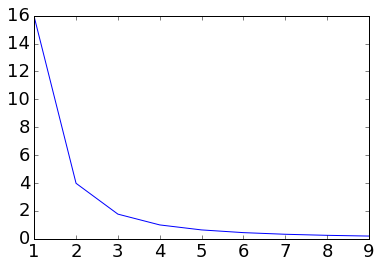

In [78]:
s=200

plt.plot(range(1,10), [phi_o_r(r, s) for r in range(1,10)])